# review 3

- 사이킷런으로 수행하는 타이타닉 생존자 예측

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 칼럼 타입 확인해보자

In [28]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- pandas의 object 타입은 string 문자열 타입으로 봐도 무방하다. 
- 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 전처리 수행해야 함
  - DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경하자.

- Null 컬럼들에 대한 전처리

In [29]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True) # 어차피 문자열 칼럼이라서 일단 Null도 문자열로 변환
titanic_df['Embarked'].fillna('N',inplace=True) # 어차피 문자열 칼럼이라서 일단 Null도 문자열로 변환

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [30]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
titanic_df.isnull().sum().sum()

0

- 현재 남아있는 문자열 feature는 Sex,Cabin,Embarked이다. 

In [33]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin의 경우 N이 687건으로 가장 많은 것이 좀 특이하긴 함.
  - 속성값이 제대로 정리되지 않은 것 같음
- Cabin의 경우 첫글자가 제일 중요해보이므로 첫글자만 따서 재정리해보자

In [34]:
titanic_df['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [35]:
# 문자열 인덱싱해서 새로운 열 생성하기(여기서는 기존의 열 Cabin을 인덱싱해서 기존의 열 구성을 변경해준 것임)
# 문자열 쪼개서 새로운 열을 생성해줄 수도 있다.
# 다음을 참고한다. 
# https://hleecaster.com/pandas-data-cleaning-2/
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

- 머신러닝 알고리즘을 적용해 예측 수행 전, 데이터를 먼저 탐색해보자
  - 어떤 유형의 승객이 생존 확률이 높을까?
  - 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해보자

In [36]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

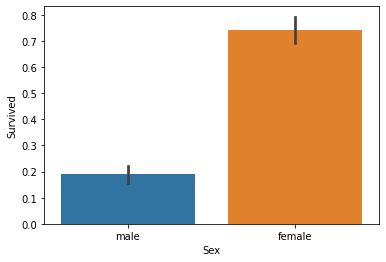

In [37]:
sns.barplot(x='Sex', y='Survived', data = titanic_df)

- 부자와 가난한 사람 간의 생존 확률에 대해 알아보자
  - 객실 등급으로 확인할 수 있을 것이다. 
  - + 성별까지 함께 고려해보자 
    - hue 파라미터를 추가해주면 된다. 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

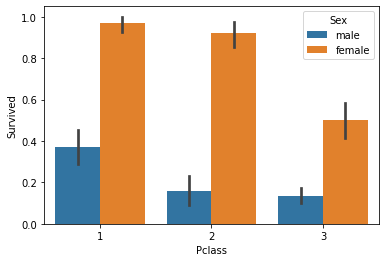

In [38]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

- 분석
  - 여성의 경우 일,이등실에 따른 생존 확률의 차이가 크지 않으나. 삼등실의 경우 생존 확률이 상대적으로 많이 떨어졌다.
  - 남성의 경우 일등실의 생존확률이 이,삼등실의 생존확률보다 월등히 높다. 

- Age에 따른 생존 확률을 알아보자
  - 값 종류가 많기 때문에 카테고리를 나눠서 분석해보자

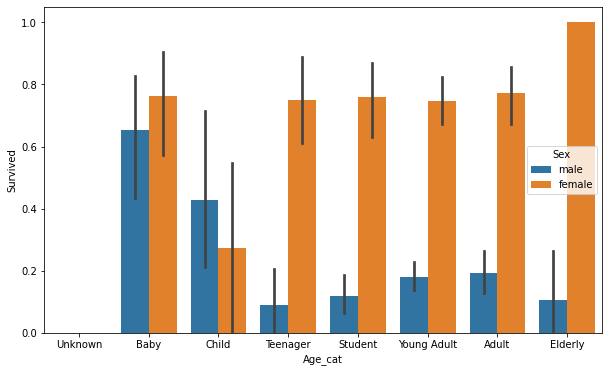

In [39]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# DataFrame의 apply lambda식에 사용
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
# order = group_names을 통해 X축의 값을 순차적으로 표시해준다.
titanic_df.drop('Age_cat', axis=1, inplace=True) # 그래프 그리려고 사용했던 칼럼이니까 사용 뒤 삭제해주는 것

- 분석
  - 여자 Baby의 경우 생존 확률이 높다. 
  - 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮다. 
  - 여자 Elderly의 경우 매우 높은 생존 확률을 보인다. 

---
>  결론

    Sex, Age, PClass 등이 생존을 좌우하는 feature임을 어느 정도 확인할 수 있었다. 

---

- 좀 전에 확인했던 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환해보자
  - LabelEncoder 클래스 활용

In [40]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder() # 객체 생성
        le = le.fit(dataDF[feature]) # 데이터 변환을 위한 기준 정보 설정
        dataDF[feature] = le.transform(dataDF[feature]) # 설정된 기준 정보를 이용하여 데이터 변환
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- for문에서 features를 지정해준 속성들이 숫자형으로 바뀐 것을 알 수 있다. 

---

- 지금까지 수행한 전처리
  - 1) Null 처리
  - 2) 머신러닝 알고리즘에 불필요한 속성 제거
  - 3) 레이블 인코딩
  - 그리고 1)~3)을 호출해줄 함수 설정

In [41]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True) # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Embarked'].fillna('N',inplace=True) # # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

######### 위 세 함수 모두 마지막에 return df를 입력해주었는데
######### 그렇게 함으로써 아래에서 df=df, df=df, df=df 를 통해 df를 함수를 이용한 결과로 업데이트 해줄 수 있다. 



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 이제 데이터 전처리 수행하는 함수인 `transfrom_features`를 만든 것이다.
  - 이를 이용해 원본 데이터를 한 번 가공해보자

In [42]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

- 테스트 데이터 추출

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

- ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 생존자 예측을 수행해보자
  - 예측 성능 평가는 accuracy, 정확도로 한다. 

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #  예측 성능 평가

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11) # 객체 생성
rf_clf = RandomForestClassifier(random_state=11) # 객체 생성
lr_clf = LogisticRegression() # 객체 생성 , 회귀이기 때문에 random_state 설정해줄 필요 없다. 

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# error 발생 부분
# LogisticRegression 학습/예측/평가
# lr_clf.fit(X_train , y_train)
# lr_pred = lr_clf.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547


> 결론 : 3개의 ML 모델 中 LogisticRegression 정확도가 가장 높음

---

- 마지막 줄은  'str' object has no attribute 'decode'라는 ERROR 발생
  - [해결책 출처](https://www.inflearn.com/questions/126731)
  - sol 1) !pip install h5py==2.10.0
  - sol 2) !pip install h5py==2.10.0 --force-reinstall (Anaconda prompt 관리자 권한 실행)
  - sol 3) markdown==3.2.2 설치
  - 모두 해결 안 된다면, 내부 패키지가 꼬였을 확률 높음
    - Google Colab으로 해결하면 된다.

---